In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('bank_scoring_train.csv', delimiter='\t')
test_data = pd.read_csv('bank_scoring_test.csv', delimiter='\t')

X_train = data.drop('SeriousDlqin2yrs', axis=1)
y_train = data.SeriousDlqin2yrs
X_test = test_data.drop('SeriousDlqin2yrs', axis=1)
y_test = test_data.SeriousDlqin2yrs

# Decision tree

In [6]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
acc, f1

(0.9518563172992974, 0.6559714795008912)

In [7]:
tree.get_depth(), tree.get_n_leaves(), tree.get_params()

(36,
 5325,
 {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'})

In [8]:
conf_matr = confusion_matrix(y_test, y_pred_tree)
pd.DataFrame(conf_matr)

,0,1
0,21791,616
1,542,1104


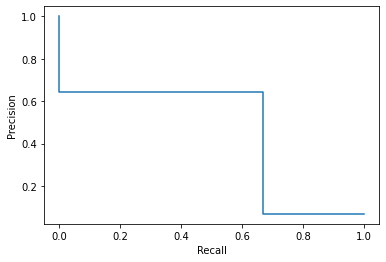

In [9]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_tree)
pr_display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# SVM

In [10]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
acc_svm, f1_svm

(0.93152621294641, 0.0)

In [11]:
conf_matr_svm = confusion_matrix(y_test, y_pred_svm)
pd.DataFrame(conf_matr_svm)

,0,1
0,22406,1
1,1646,0


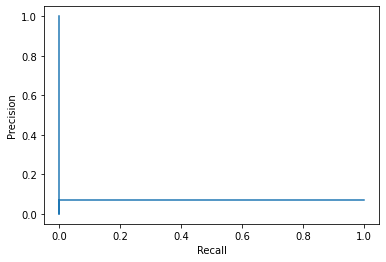

In [12]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_svm)
pr_display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# KNN

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
acc_knn, f1_knn

In [ ]:
conf_matr_svm = confusion_matrix(y_test, y_pred_knn)
pd.DataFrame(conf_matr_svm)

In [ ]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_knn)
pr_display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall).plot()